In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
df = pd.read_excel('./MERGED_DATA_TEMP.xlsx')
df.head()

,LOC_CODE,DATUM,TIJD,ZS [mg/l],ZICHT [dm],T [oC],SiO2 [umol/L],SALNTT [DIMSLS],PO4 [umol/L],pH [DIMSLS],...,Rst,Rte,Stu,Tni,Tec,Tle,Tno,Tro,Tor,Dat
0,DANTZGT,1990-01-10,15:00:00,135.0,2.0,4.0,20.178571,29.19,1.645161,7.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DANTZGT,1990-02-06,13:40:00,295.0,0.5,6.0,NaN,27.37,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DANTZGT,1990-03-08,13:45:00,103.0,3.0,7.3,19.428571,24.99,0.709677,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DANTZGT,1990-04-04,10:00:00,113.0,3.0,8.2,6.285714,28.79,0.806452,8.1,...,NaN,NaN,NaN,4.669596,3.572755,3.572755,NaN,4.475787,NaN,NaN
4,DANTZGT,1990-05-09,15:30:00,20.0,11.0,17.4,1.714286,33.28,1.161290,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.012035,1.973128,NaN


In [3]:
abiotic_factors = [
    'ZS [mg/l]', 'ZICHT [dm]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]',
    'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]',
    'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d'
]

locations = [
    'GROOTGND', 'HUIBGOT', 'SCHAARVODDL', 'DANTZGT', 'VLISSGBISSVH', 'MARSDND', 
    'HANSWGL', 'GOERE6', 'WALCRN2', 'NOORDWK20', 'ROTTMPT3', 'SOELKKPDOT', 
    'NOORDWK2', 'WALCRN70', 'NOORDWK70', 'TERSLG10', 'NOORDWK10', 'WALCRN20', 
    'TERSLG4', 'ROTTMPT70', 'LODSGT', 'TERSLG135', 'ROTTMPT50', 'TERSLG235', 
    'DREISR', 'TERSLG100', 'TERSLG175'
]

In [4]:
df = df[df['LOC_CODE'].isin(locations)]

# Drop the column 'ZICHT [dm]' due to many NaN values
df_abiotic = df[['LOC_CODE'] + abiotic_factors].drop(columns=['ZICHT [dm]'])

for factor in abiotic_factors:
    if factor not in df.columns:
        raise ValueError(f"Column {factor} is not in the dataset")
    


In [5]:
# List of abiotic factors without 'ZICHT [dm]'
abiotic_factors = [
    'ZS [mg/l]', 'T [oC]', 'SiO2 [umol/L]', 'SALNTT [DIMSLS]',
    'PO4 [umol/L]', 'pH [DIMSLS]', 'NO3 [umol/L]', 'NO2 [umol/L]', 'NH4 [umol/L]',
    'E [/m]', 'CHLFa [ug/l]', '    Q', 'PAR [J/m2d]', 'PAR [kJ/m2d]', 'kPAR_7d', 'kPAR_14d'
]

In [6]:
df_abiotic = df[['LOC_CODE'] + abiotic_factors]

# Interpolate missing values
interpolated_abiotic_df = df_abiotic.groupby("LOC_CODE").apply(lambda group: group.interpolate(method="linear", limit_direction="both"))


/tmp/ipykernel_23954/3104405636.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  interpolated_abiotic_df = df_abiotic.groupby("LOC_CODE").apply(lambda group: group.interpolate(method="linear", limit_direction="both"))


In [7]:
def plot_data_distributions(df, bins=20):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(df.columns[1:], 1):
        plt.subplot(5, 4, i)
        df[column].plot(kind='hist', bins=bins, title=column)
    plt.tight_layout()
    plt.show()

Data distributions before interpolation:


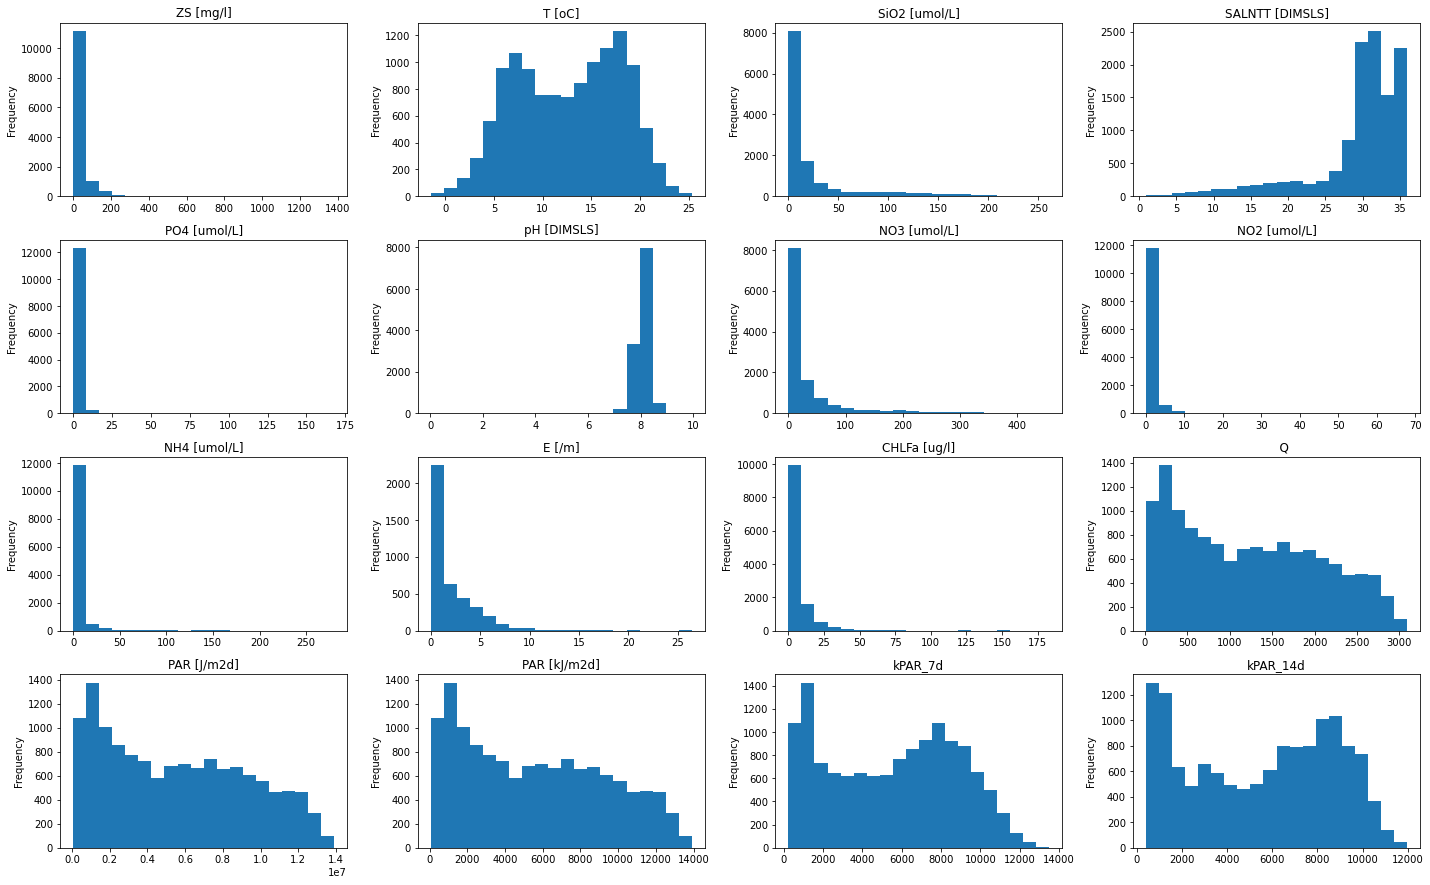

Data distributions after interpolation:


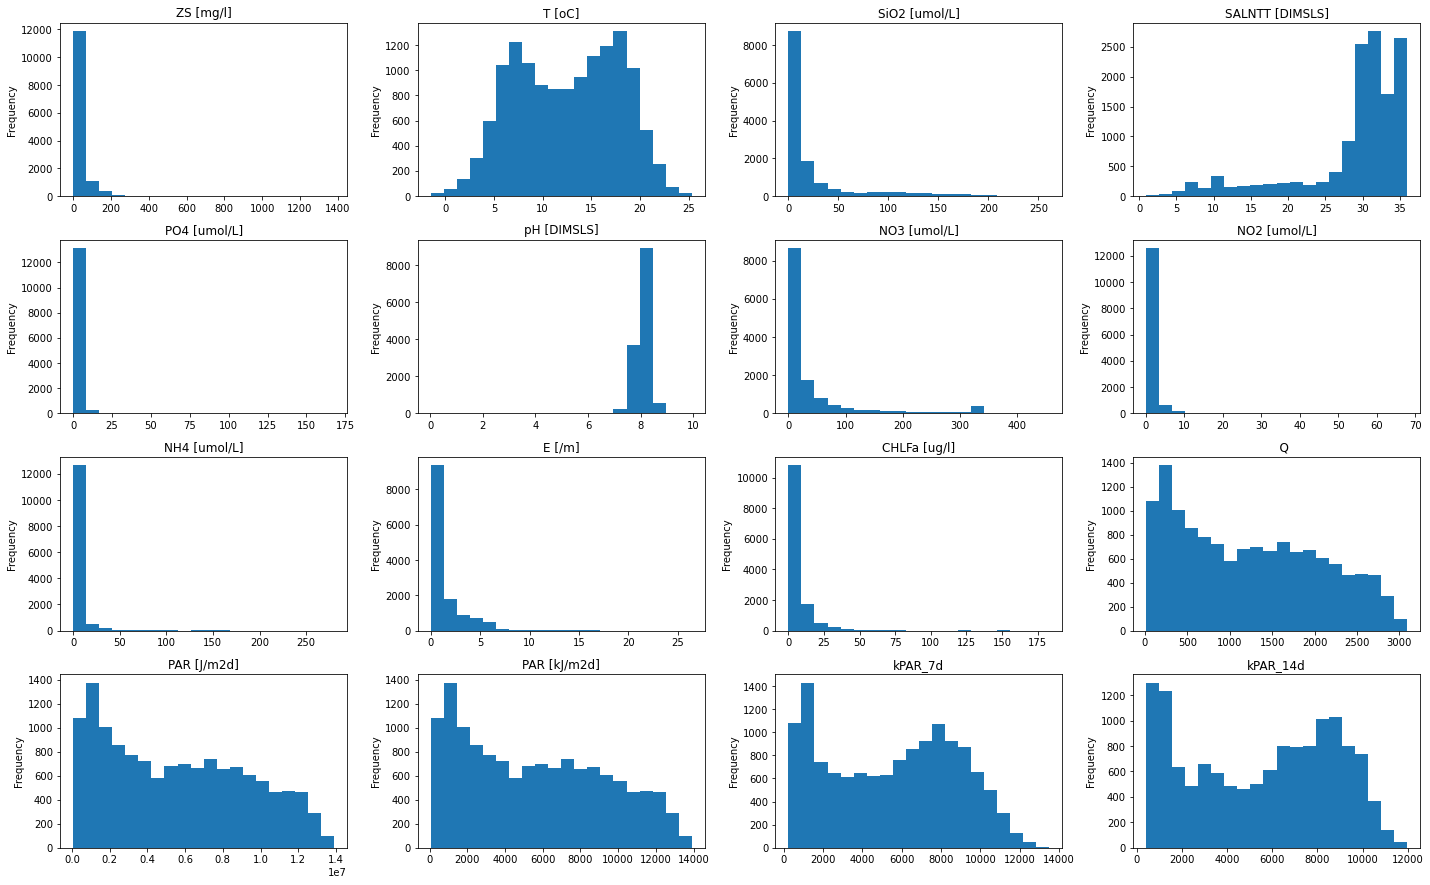

In [8]:
print("Data distributions before interpolation:")
plot_data_distributions(df_abiotic, bins=20)

print("Data distributions after interpolation:")
plot_data_distributions(interpolated_abiotic_df, bins=20)

In [9]:
percent_missing = interpolated_abiotic_df.isnull().sum() * 100 / len(interpolated_abiotic_df)
print("\nPercentage of missing values after interpolation:")
print(percent_missing.to_string())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(interpolated_abiotic_df[abiotic_factors])



Percentage of missing values after interpolation:
LOC_CODE           0.0
ZS [mg/l]          0.0
T [oC]             0.0
SiO2 [umol/L]      0.0
SALNTT [DIMSLS]    0.0
PO4 [umol/L]       0.0
pH [DIMSLS]        0.0
NO3 [umol/L]       0.0
NO2 [umol/L]       0.0
NH4 [umol/L]       0.0
E [/m]             0.0
CHLFa [ug/l]       0.0
    Q              0.0
PAR [J/m2d]        0.0
PAR [kJ/m2d]       0.0
kPAR_7d            0.0
kPAR_14d           0.0


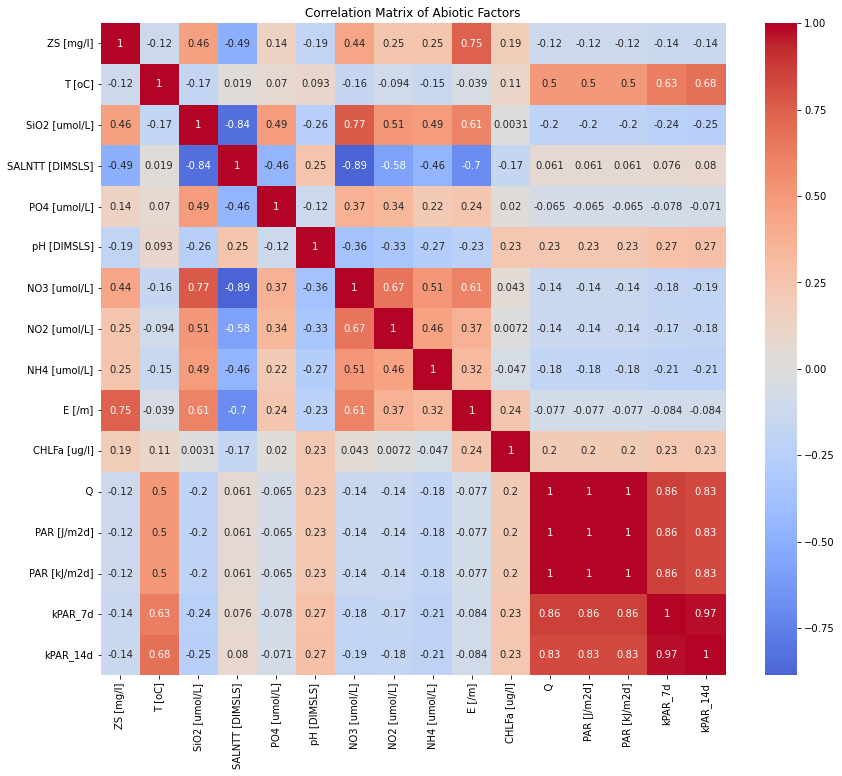

In [10]:
corr_matrix = pd.DataFrame(df_scaled, columns=abiotic_factors).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Abiotic Factors')
plt.show()


In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/si

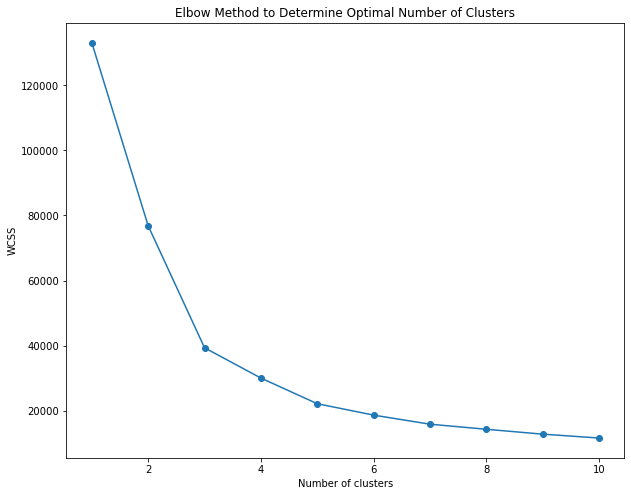

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_23954/1401015289.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[interpolated_abiotic_df.index, 'Cluster'] = clusters


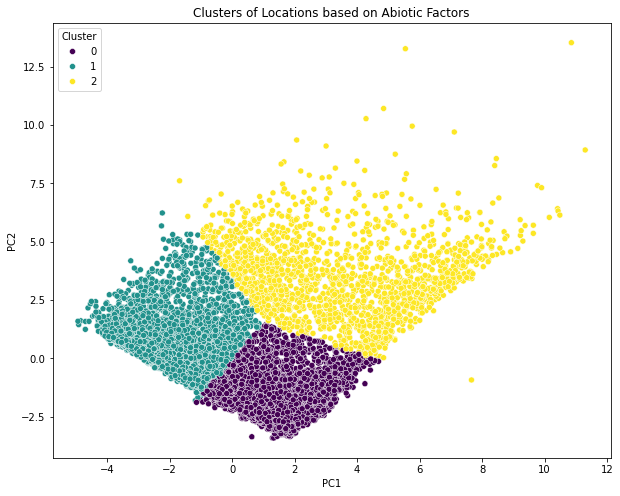

In [13]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['Cluster'] = clusters

# Add clusters to the cleaned original dataframe
df['Cluster'] = np.nan
df.loc[interpolated_abiotic_df.index, 'Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('Clusters of Locations based on Abiotic Factors')
plt.show()

In [14]:
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_locations = df[df['Cluster'] == cluster_num]['LOC_CODE'].unique()
    print(cluster_locations)

Cluster 0:
['DANTZGT' 'DREISR' 'GOERE6' 'GROOTGND' 'HANSWGL' 'HUIBGOT' 'LODSGT'
 'MARSDND' 'NOORDWK10' 'NOORDWK2' 'NOORDWK20' 'NOORDWK70' 'ROTTMPT3'
 'ROTTMPT50' 'ROTTMPT70' 'SCHAARVODDL' 'SOELKKPDOT' 'TERSLG10' 'TERSLG100'
 'TERSLG135' 'TERSLG175' 'TERSLG235' 'TERSLG4' 'VLISSGBISSVH' 'WALCRN2'
 'WALCRN20' 'WALCRN70']
Cluster 1:
['DANTZGT' 'DREISR' 'GOERE6' 'GROOTGND' 'HANSWGL' 'HUIBGOT' 'LODSGT'
 'MARSDND' 'NOORDWK10' 'NOORDWK2' 'NOORDWK20' 'NOORDWK70' 'ROTTMPT3'
 'ROTTMPT50' 'ROTTMPT70' 'SCHAARVODDL' 'SOELKKPDOT' 'TERSLG10' 'TERSLG100'
 'TERSLG135' 'TERSLG175' 'TERSLG235' 'TERSLG4' 'VLISSGBISSVH' 'WALCRN2'
 'WALCRN20' 'WALCRN70']
Cluster 2:
['DANTZGT' 'GROOTGND' 'HANSWGL' 'NOORDWK70' 'ROTTMPT70' 'SCHAARVODDL'
 'SOELKKPDOT' 'TERSLG4' 'VLISSGBISSVH' 'WALCRN20']


/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/milan/.local/lib/python3.10/si

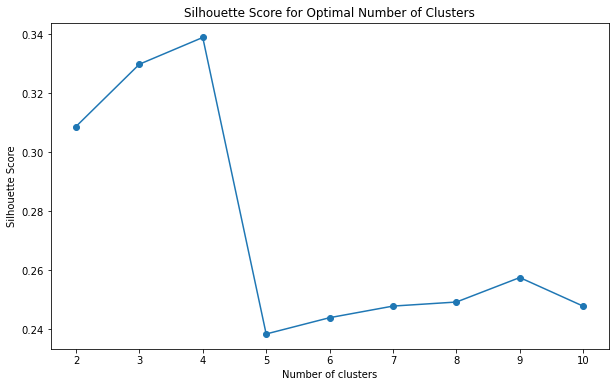

In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, clusters))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

/home/milan/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_23954/1027023826.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[interpolated_abiotic_df.index, 'Cluster'] = clusters


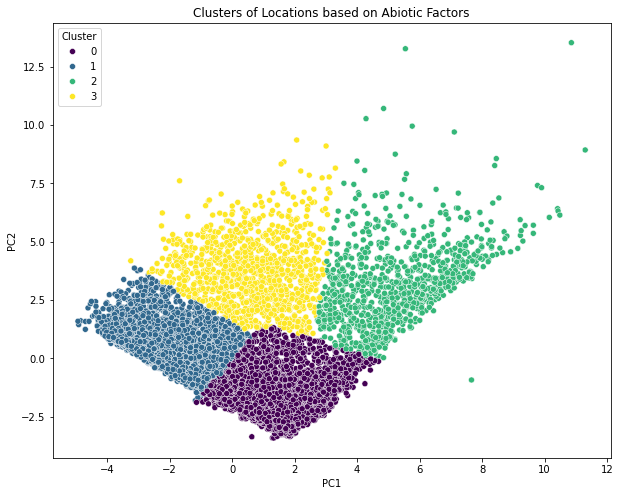

In [17]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_df)
pca_df['Cluster'] = clusters

# Add clusters to the cleaned original dataframe
df['Cluster'] = np.nan
df.loc[interpolated_abiotic_df.index, 'Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('Clusters of Locations based on Abiotic Factors')
plt.show()

In [18]:
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_locations = df[df['Cluster'] == cluster_num]['LOC_CODE'].unique()
    print(cluster_locations)

Cluster 0:
['DANTZGT' 'DREISR' 'GOERE6' 'GROOTGND' 'HANSWGL' 'HUIBGOT' 'LODSGT'
 'MARSDND' 'NOORDWK10' 'NOORDWK2' 'NOORDWK20' 'NOORDWK70' 'ROTTMPT3'
 'ROTTMPT50' 'ROTTMPT70' 'SCHAARVODDL' 'SOELKKPDOT' 'TERSLG10' 'TERSLG100'
 'TERSLG135' 'TERSLG175' 'TERSLG235' 'TERSLG4' 'VLISSGBISSVH' 'WALCRN2'
 'WALCRN20' 'WALCRN70']
Cluster 1:
['DANTZGT' 'DREISR' 'GOERE6' 'HANSWGL' 'HUIBGOT' 'LODSGT' 'MARSDND'
 'NOORDWK10' 'NOORDWK2' 'NOORDWK20' 'NOORDWK70' 'ROTTMPT3' 'ROTTMPT50'
 'ROTTMPT70' 'SOELKKPDOT' 'TERSLG10' 'TERSLG100' 'TERSLG135' 'TERSLG175'
 'TERSLG235' 'TERSLG4' 'VLISSGBISSVH' 'WALCRN2' 'WALCRN20' 'WALCRN70']
Cluster 2:
['DANTZGT' 'GROOTGND' 'HANSWGL' 'NOORDWK70' 'SCHAARVODDL' 'SOELKKPDOT'
 'TERSLG4' 'VLISSGBISSVH']
Cluster 3:
['DANTZGT' 'GROOTGND' 'HANSWGL' 'ROTTMPT70' 'SCHAARVODDL' 'SOELKKPDOT'
 'VLISSGBISSVH' 'WALCRN20']
